In [14]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [15]:
# Load the dataset
iris = load_iris()

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [17]:
print(len(X_train))
print(len(X_test))

120
30


In [18]:
# Train the kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Calculate the accuracy on the test set
accuracy = knn.score(X_test, y_test)
precision = precision_score(y_test, knn.predict(X_test), average='weighted')
print('Accuracy on test set:', accuracy)
print('Precision on test set:', precision)

Accuracy on test set: 1.0
Precision on test set: 1.0


### Plot function of accuracy against different k values

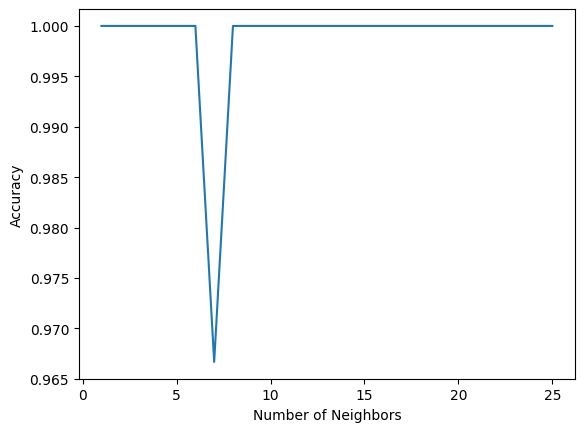

In [22]:
# Train the kNN classifier
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the model performance
plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### Plotting decision boundaries with reduced dimensions

In [8]:
# Extract the first two features for visualization
X = iris.data[:, :2]
y = iris.target

In [9]:
# Train the kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

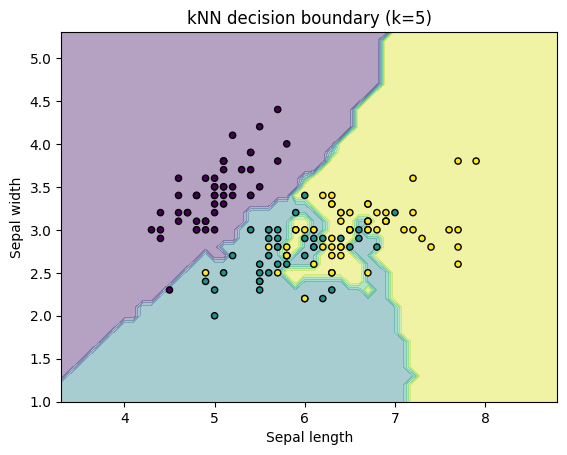

In [10]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('kNN decision boundary (k=5)')
plt.show()

TODO: Change the parameters (k) and different variables and visualize the decision boundary